In [1]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pyspark.sql.types
import smartbear
import echart
import datetime
import imputation
from pyecharts.charts import Bar, Scatter
from pyecharts import options as opts

#import sys
#sys.path.append("/Volumes/Data/echarts-python/")
#import echarts

sb = smartbear.sb_spark()

22/06/10 16:09:47 WARN Utils: Your hostname, Tommasos-MacBook-Air.local resolves to a loopback address: 127.0.0.1, but we couldn't find any external IP address!
22/06/10 16:09:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/06/10 16:09:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
linkId = 'balance_disord'
#patients = sb.get_patients_by_questionnaire(linkId=linkId)
#print(patients.show())
#patient_list = sb.df_column_to_list(patients,col_name='Patient_id')
patients = ['32578327']
#codes = ['1158']
codes = []
#component_codes = ['62476001']
component_codes = ['8460-8']
time = 'week'
expr = 'has_weekly'
expr_value = [0.25,0.75]
custom_expr=None
fix_time=True

In [4]:
df = sb.filter_observations('32578327', None, '8460-8')
pd.DataFrame(df.toPandas()).head()

,subject_reference,effectiveDateTime,code_coding_code,component_code_coding_code,valueQuantity_value,component_valueQuantity_value


In [5]:
df = sb.filter_observations('32578327', None, '8460-8')
# df = sb.patientid(df)
df1 = sb.trunc_time(df, sb.TIME, [sb.CMP_CODE], {sb.CMP_VALUE:'avg'})
df2 = sb.fill_missing_time_values(df, sb.TIME, [sb.CMP_CODE], {sb.CMP_VALUE:'avg'})
imputation.missing_matrix(pd.DataFrame(df1.toPandas()))
# print(df1.count(), df1.show(10))
# print(df2.count(), df2.show(10))
imputation.missing_matrix(pd.DataFrame(df2.toPandas()))

AttributeError: 'sb_spark' object has no attribute 'trunc_time'

In [ ]:

x = sb.df_column_to_list(df2, 'new_effectiveDateTime')
y = sb.df_column_to_list(df2, 'avg('+sb.CMP_VALUE+')')
bar = Scatter()
bar.add_xaxis(x)
bar.add_yaxis('serie1', y, 
    label_opts=opts.LabelOpts(is_show=False),
    markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_='average')]),
    color='#000'
    # scale=True
    )
bar.set_global_opts(
        title_opts=opts.TitleOpts(title="Title", subtitle="Subtitle")
        )
bar.render()


'/Volumes/Data/SmartBear/render.html'

In [ ]:
relations = sb.get_alls(sb.observations, 
    ['subject_reference','code_coding_code','component_code_coding_code'])
print(relations.count(), relations.show(10))

+-----------------+----------------+--------------------------+-----+
|subject_reference|code_coding_code|component_code_coding_code|count|
+-----------------+----------------+--------------------------+-----+
|Patient/927744631|         55423-8|                      null|  475|
|Patient/927744631|         41953-1|                      null|  475|
|Patient/303827011|         55423-8|                      null|  475|
|Patient/303827011|         41953-1|                      null|  475|
| Patient/32578327|         93831-6|                      null|  463|
| Patient/32578327|         93832-4|                      null|  463|
| Patient/32578327|         93830-8|                      null|  463|
|Patient/792607756|         41953-1|                      null|  456|
|Patient/792607756|         55423-8|                      null|  456|
|Patient/621892226|         55423-8|                      null|  432|
+-----------------+----------------+--------------------------+-----+
only showing top 10 

In [ ]:
# for patient in patients:
#     sb.get_observations(codes=codes, component_codes=component_codes,
#         patients=[patient], time=time, expr=expr, expr_value=expr_value).show()

In [ ]:
import missingno as msno
%matplotlib inline

null_cols = sb.null_columns(sb.observations,0.01)
print(null_cols)
non_null_cols = sb.not_null_columns(sb.observations,0.01)
sample = sb.observations.select(non_null_cols).sample(0.1, 5)
df = pd.DataFrame(sample.toPandas())

AttributeError: 'sb_spark' object has no attribute 'null_columns'

analyzing a dataset of (rows, columns): (3334, 43)


<AxesSubplot:>

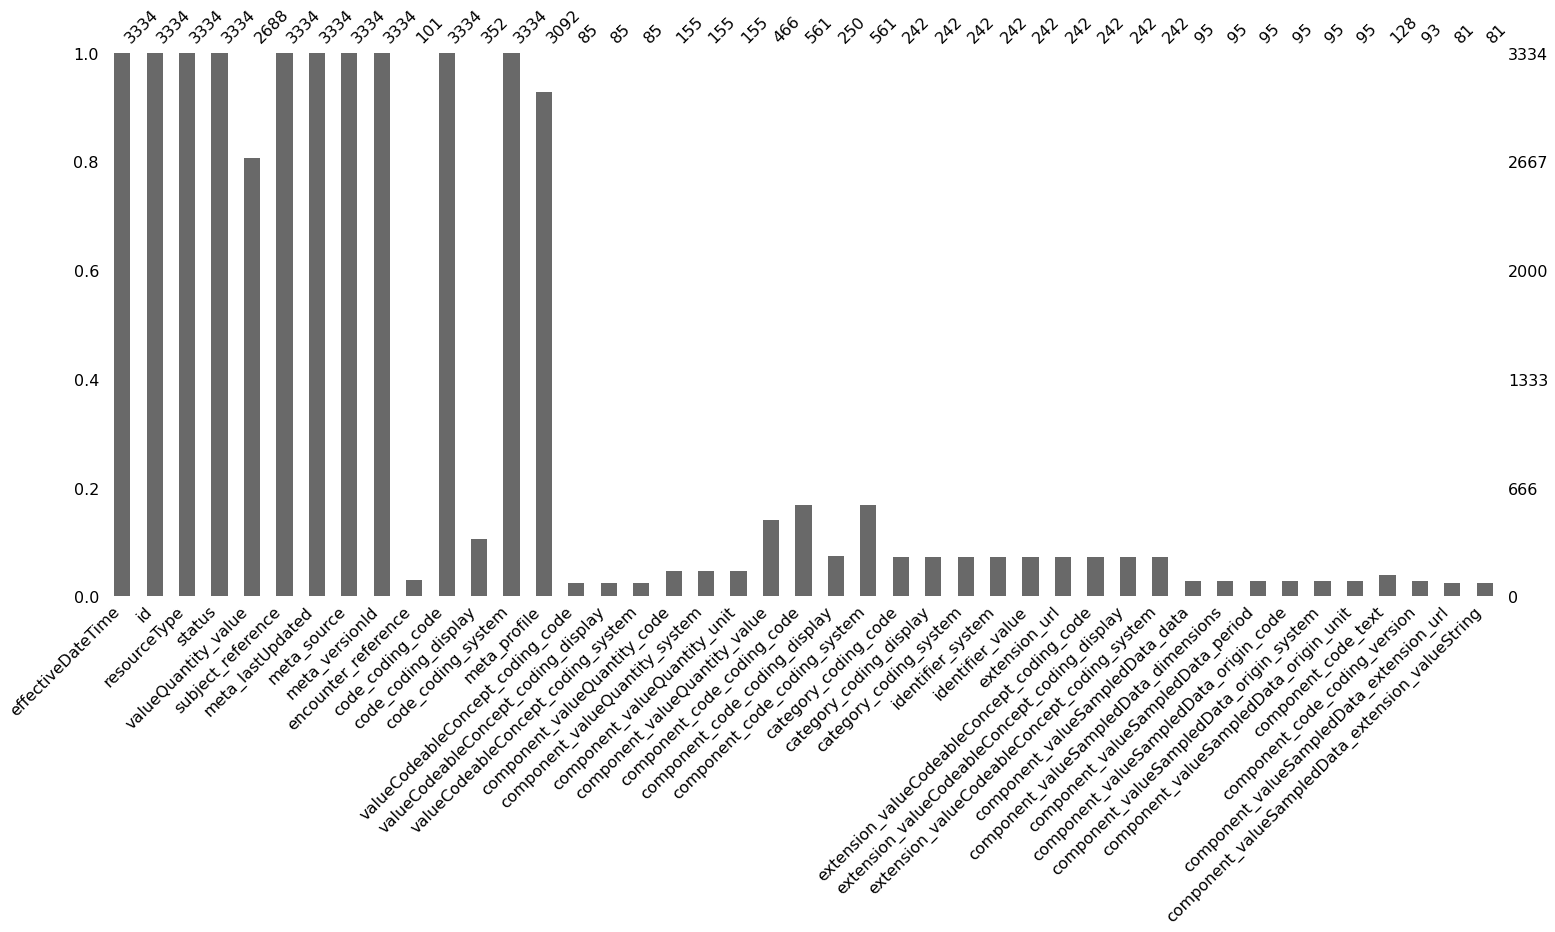

In [ ]:
print('analyzing a dataset of (rows, columns):',df.shape)
msno.bar(df)

analyzing a dataset of (rows, columns): (3334, 43)


<AxesSubplot:>

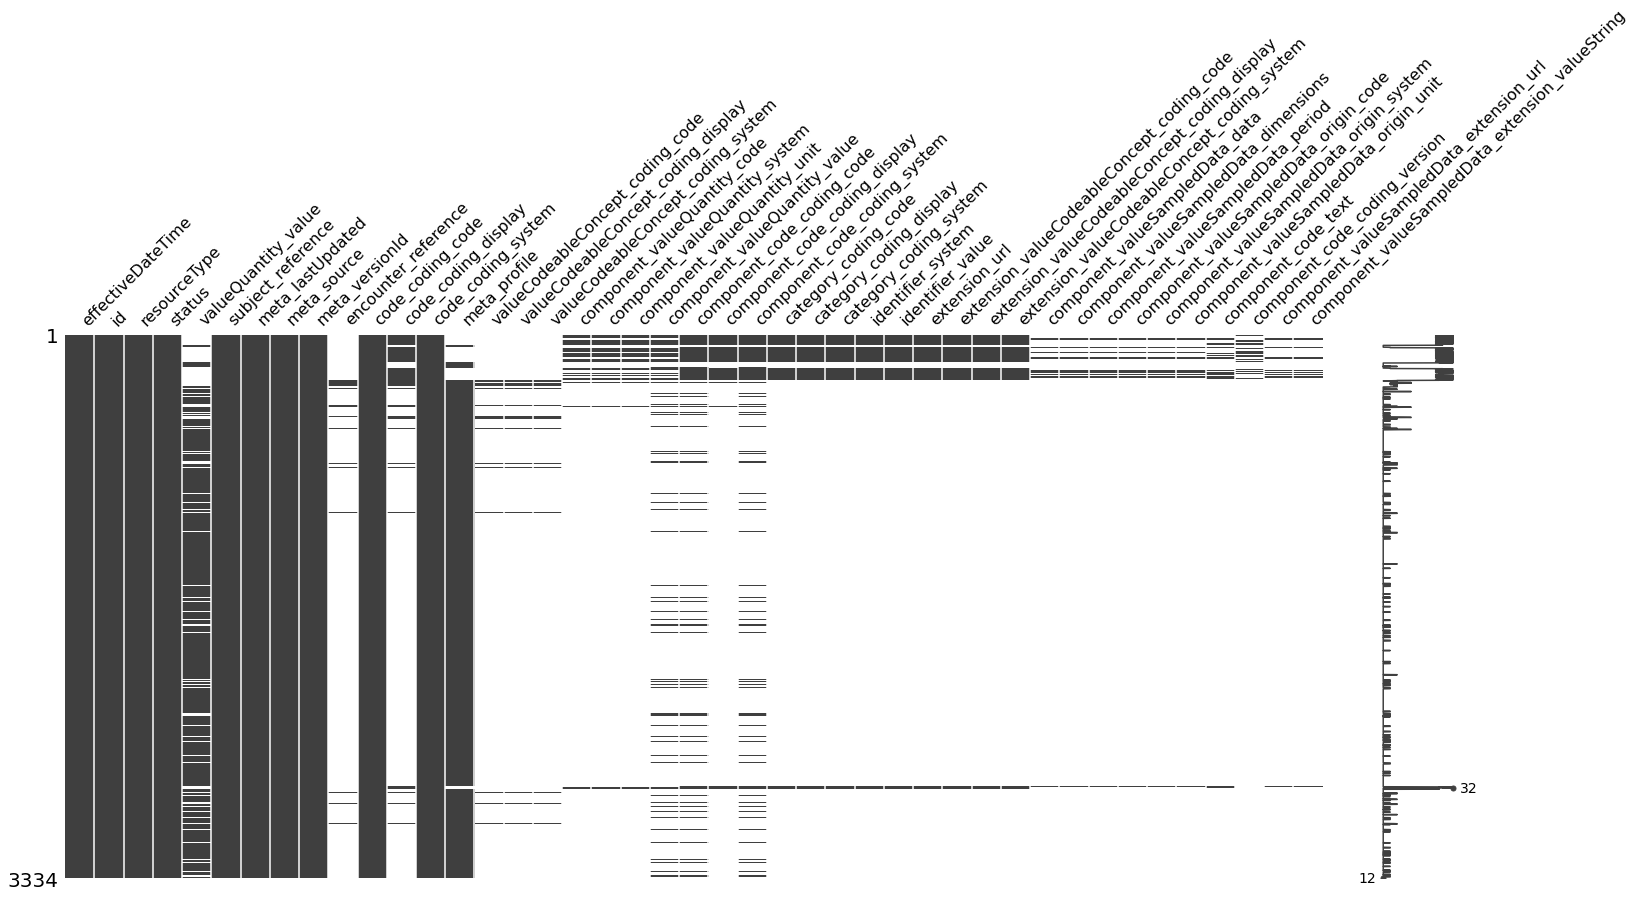

In [ ]:
print('analyzing a dataset of (rows, columns):',df.shape)
msno.matrix(df)

analyzing a dataset of (rows, columns): (3334, 43)


<AxesSubplot:>

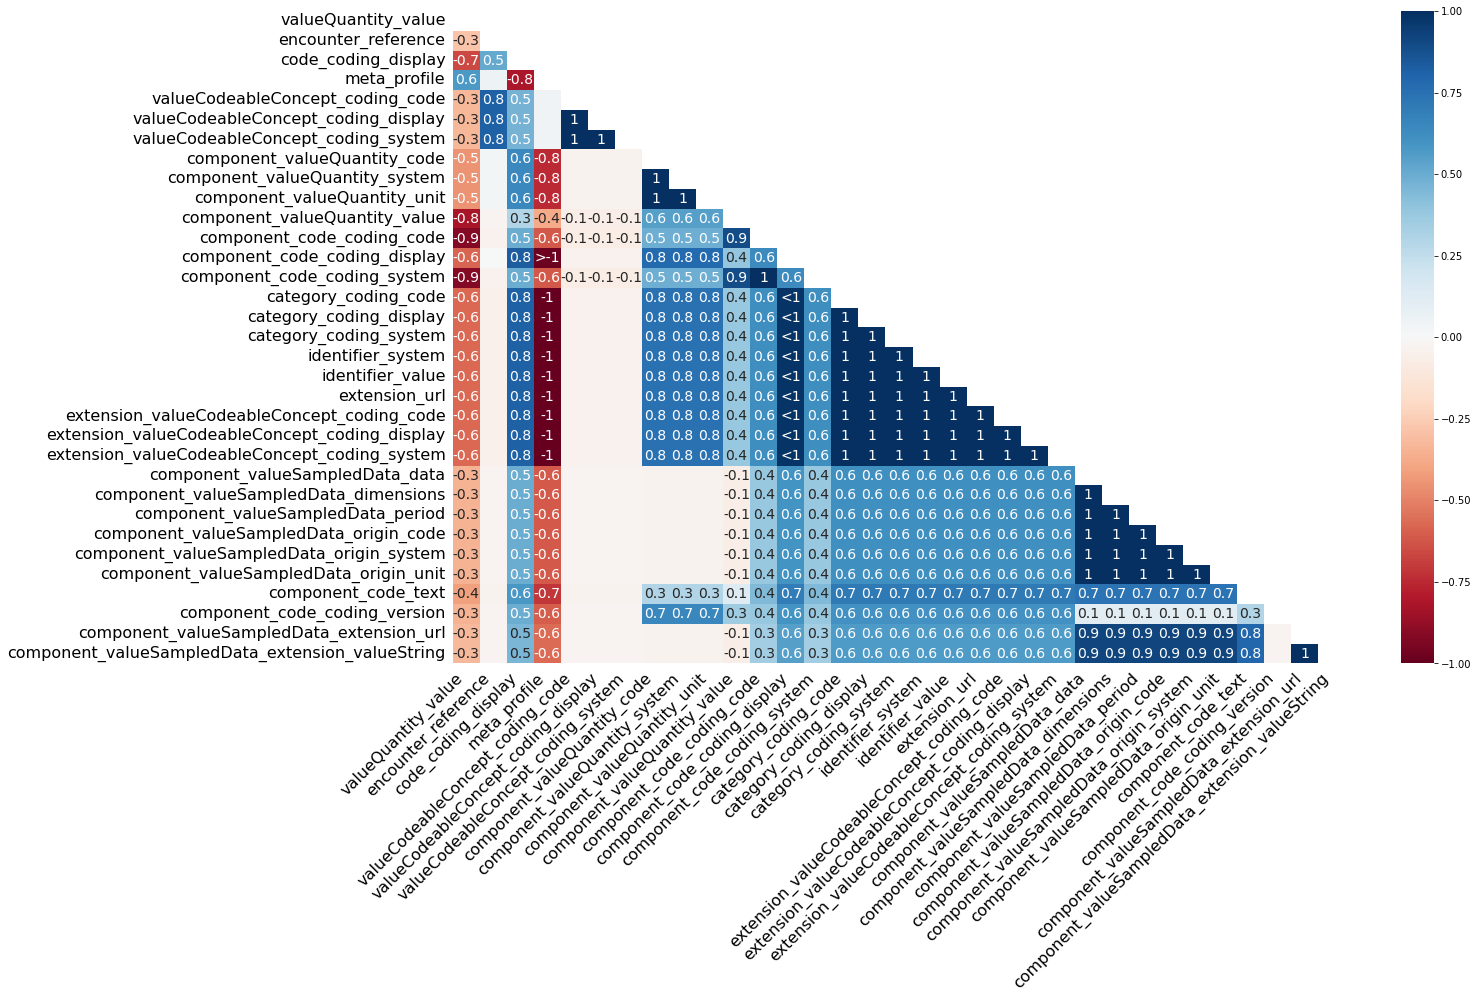

In [ ]:
print('analyzing a dataset of (rows, columns):',df.shape)
msno.heatmap(df)

analyzing a dataset of (rows, columns): (3334, 43)


<AxesSubplot:>

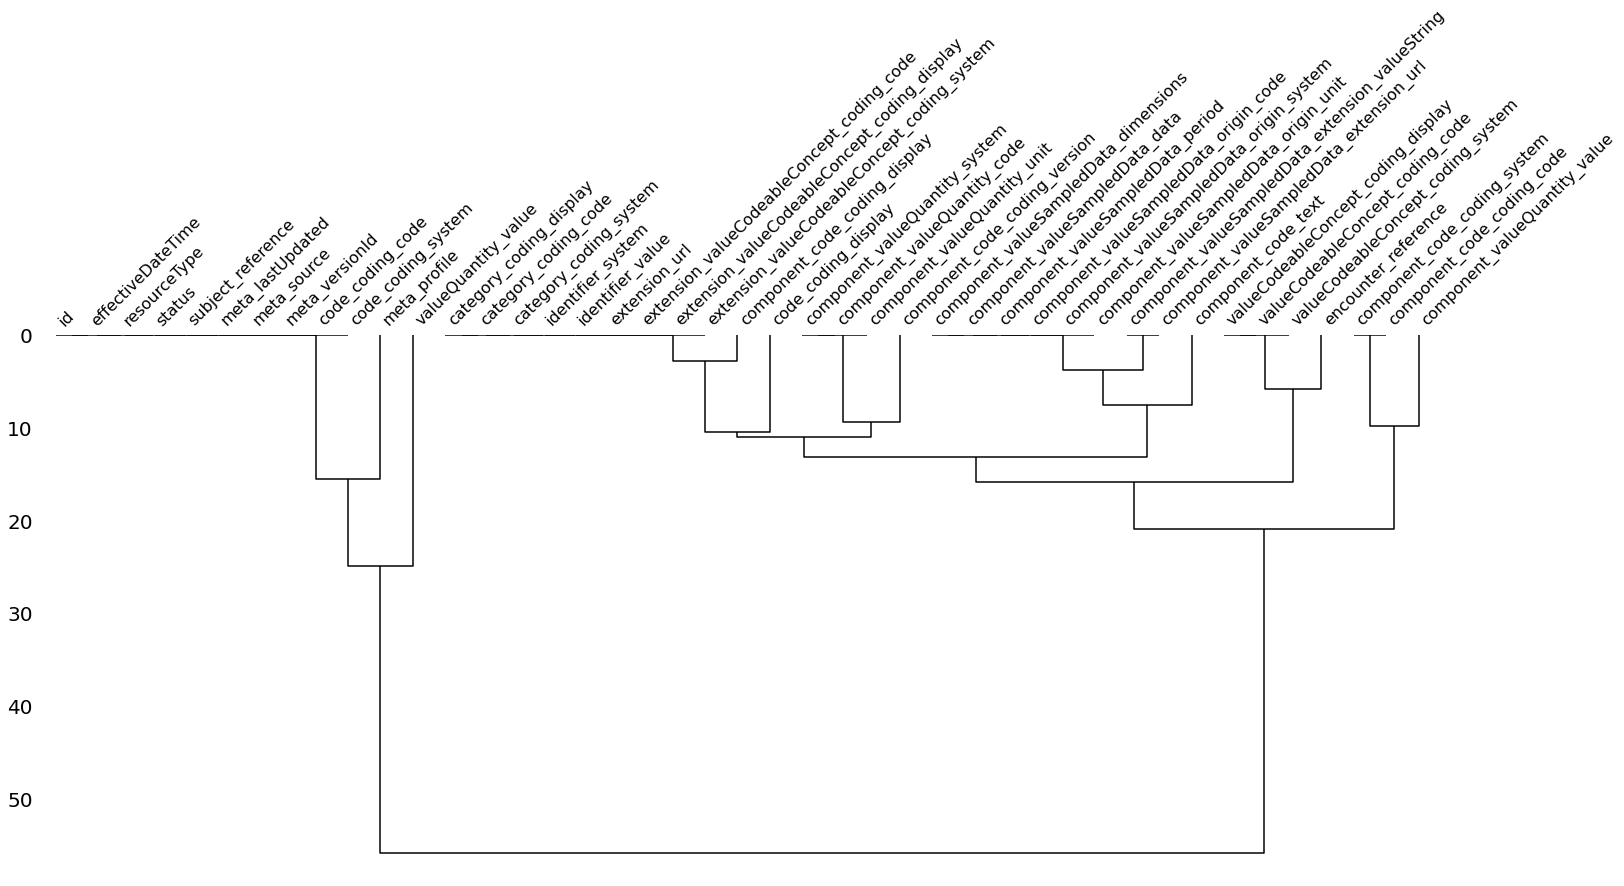

In [ ]:
print('analyzing a dataset of (rows, columns):',df.shape)
msno.dendrogram(df)